In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import numpy as np
import h5py
import os
import glob

from scipy.ndimage import median_filter

0.00017236624379481522


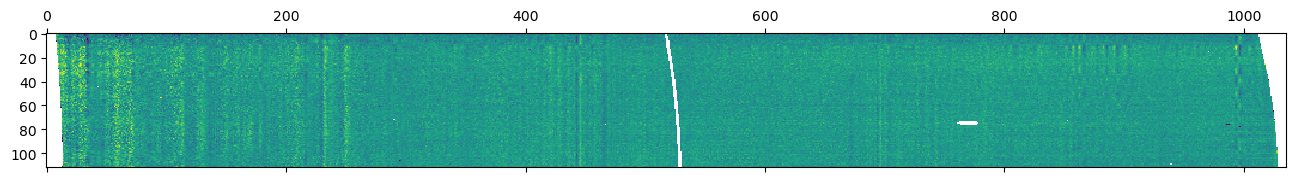

In [12]:
month_file = "/scratch/05865/maja_n/ffskysub/rescor/nomask/202003/combined/combined_multi_324_075_055_LL.h5"

with h5py.File(month_file, "r") as ff:
    rescor_month = ff['rescor'][:]

plt.matshow(rescor_month, vmin=-0.1, vmax=0.1)

print(np.sum(np.abs(rescor_month) > 0.1) / np.size(rescor_month))

In [4]:
multiframe = "combined_multi_032_094_028_LL.h5"
year_file = os.path.join("/scratch/05865/maja_n/ffskysub/rescor/nomask/2018/combined/", multiframe)
month_file = os.path.join("/scratch/05865/maja_n/ffskysub/rescor/nomask/2018{:02d}/combined/", multiframe)

with h5py.File(year_file, "r") as ff:
    rescor_year = ff['rescor'][:]

rescor_month = {}
for month in range(1,12):
    filename = month_file.format(month)
    if os.path.exists(filename):
        with h5py.File(month_file.format(month), "r") as ff:
            rescor_month[month] = ff['rescor'][:]

year :  0.0024389823496966355


/work/05865/maja_n/stampede2/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/work/05865/maja_n/stampede2/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/work/05865/maja_n/stampede2/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/work/05865/maja_n/stampede2/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/work/05865/maja_n/stampede2/anaconda3/envs/nbodykit-env/lib/python3.8/site-

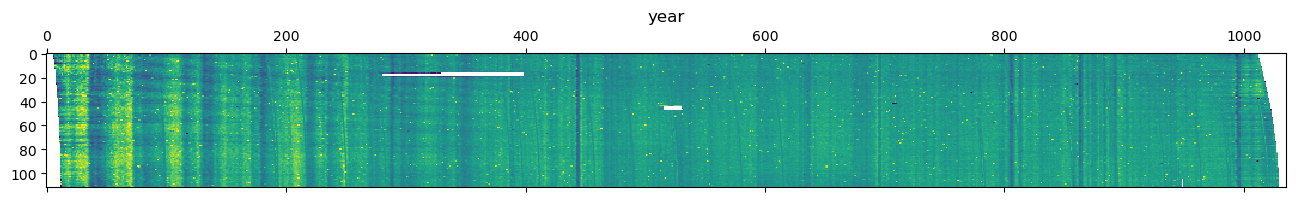

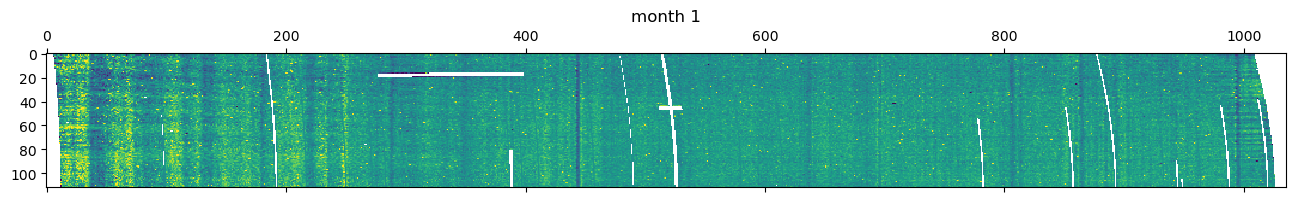

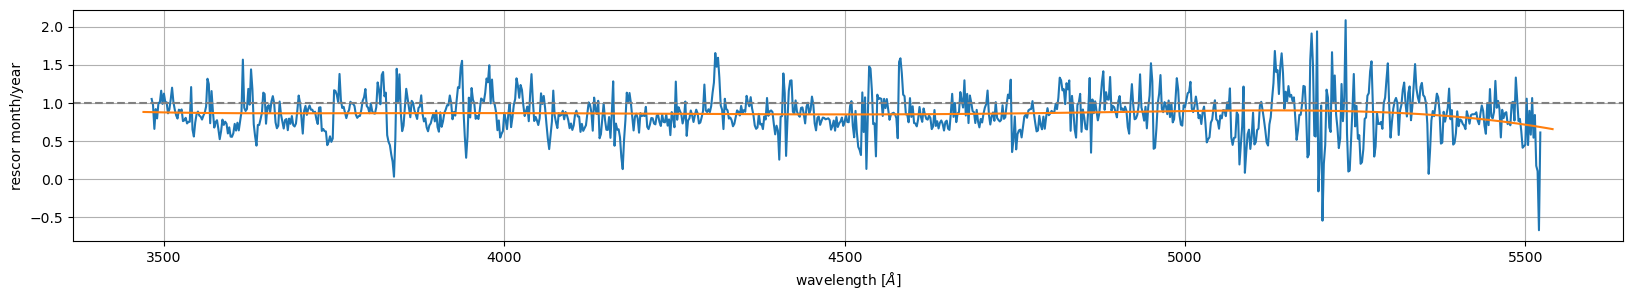

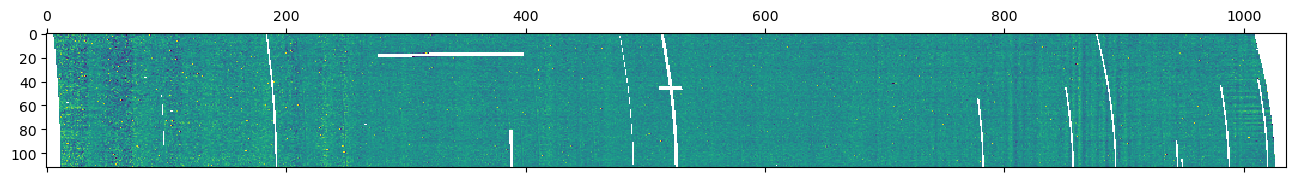

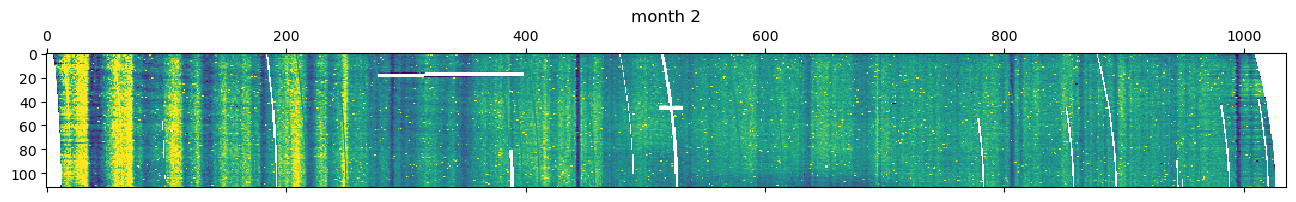

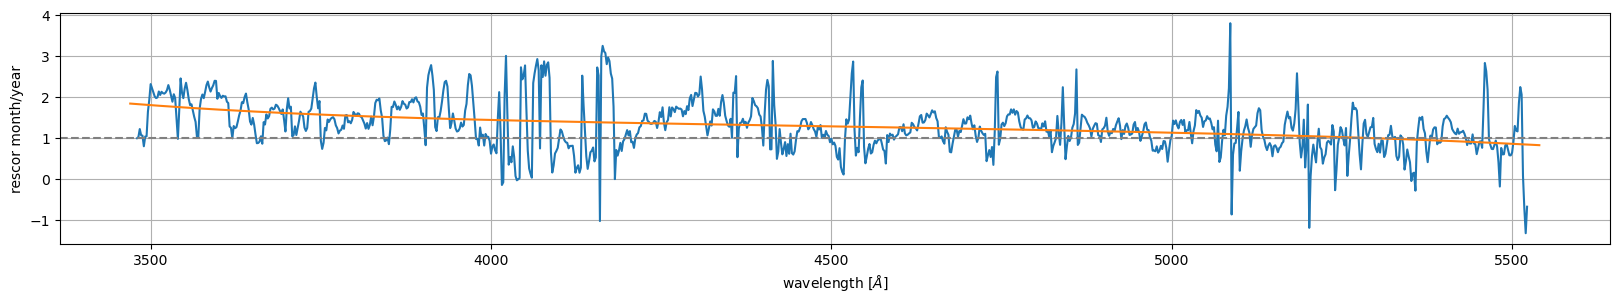

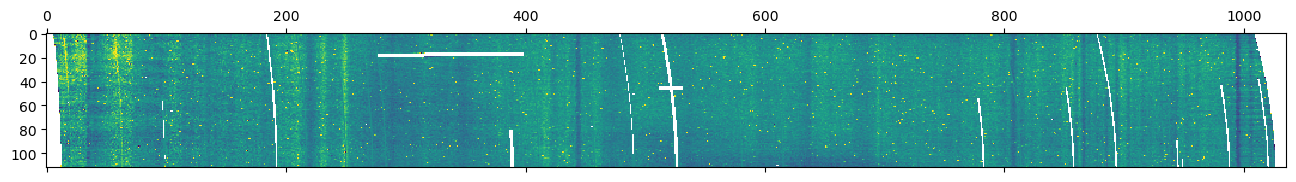

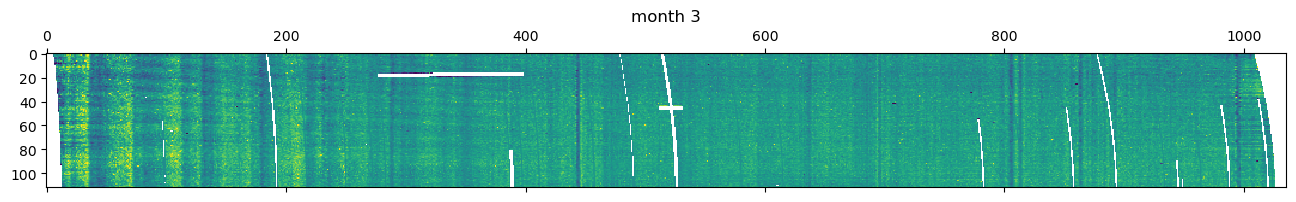

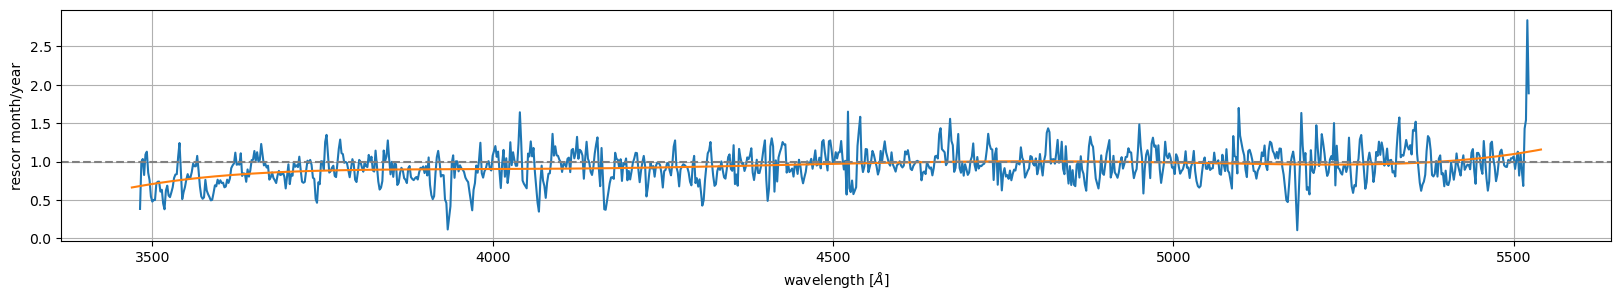

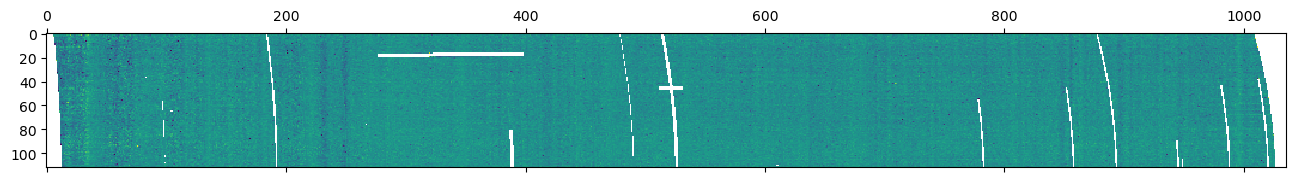

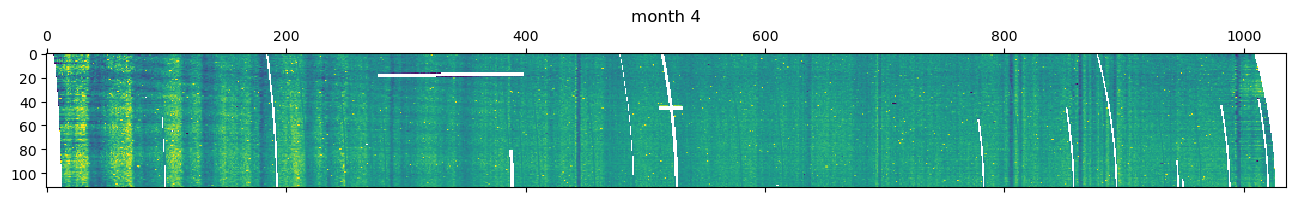

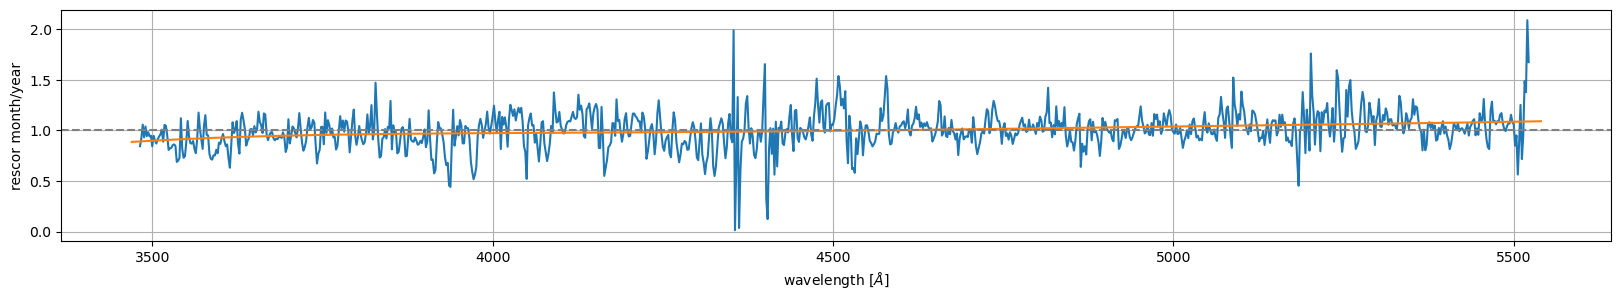

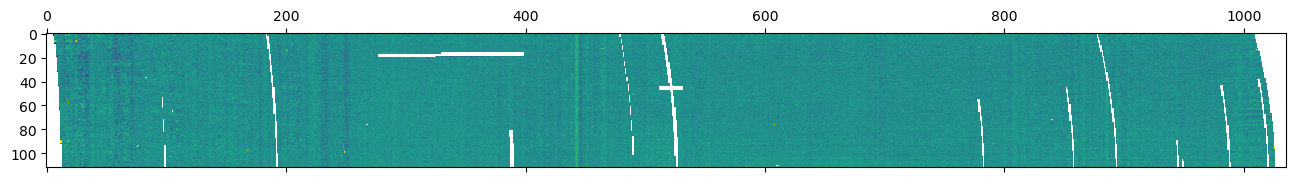

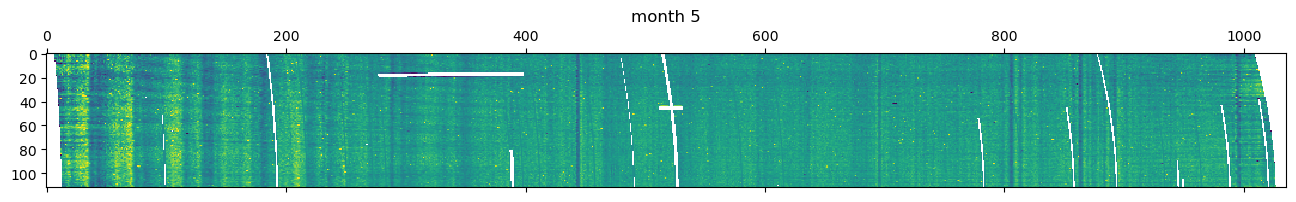

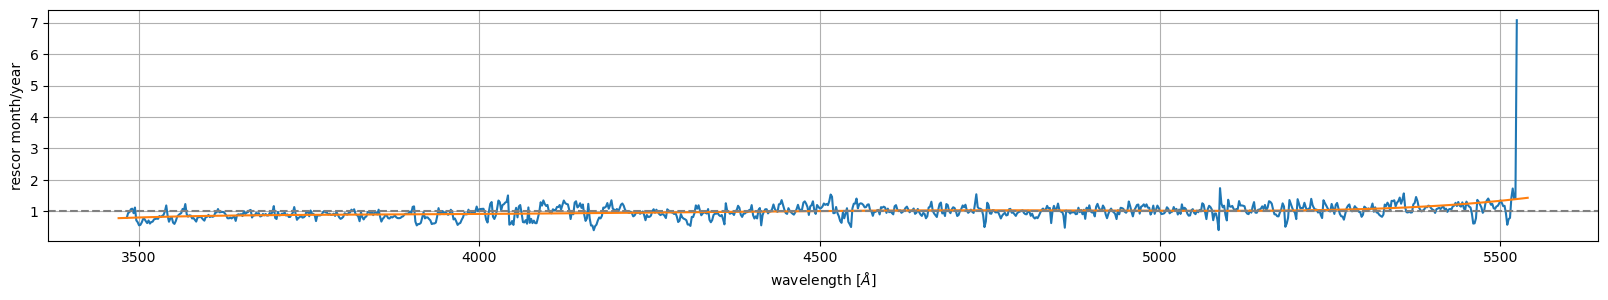

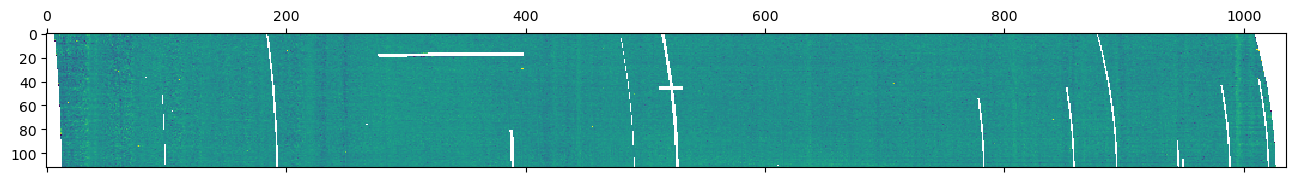

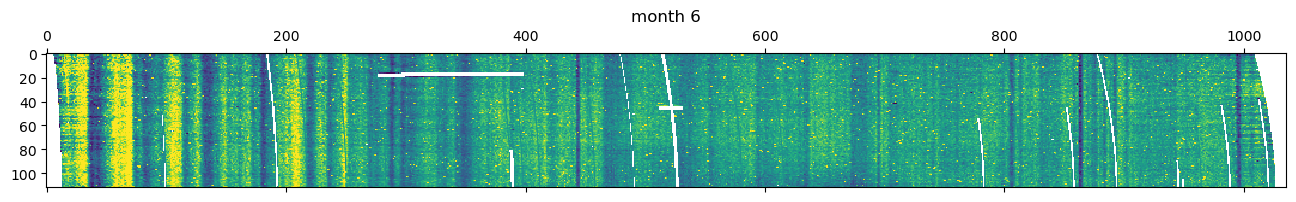

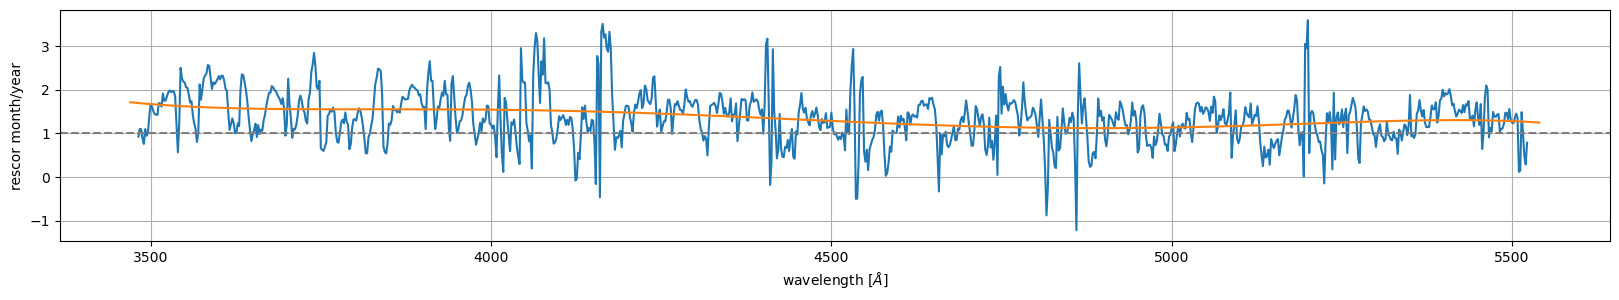

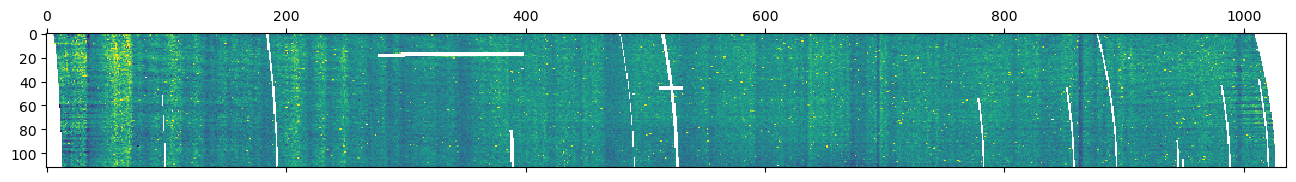

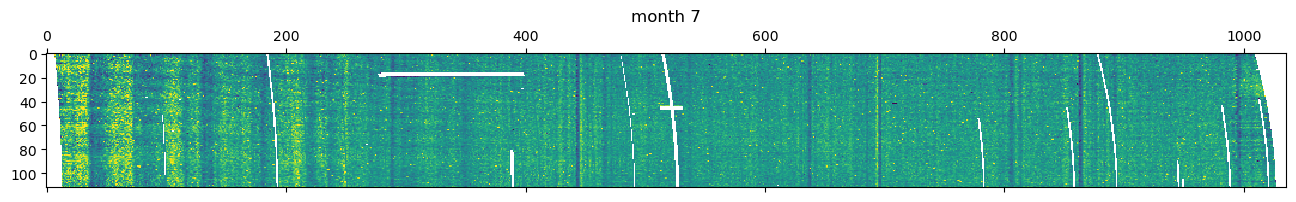

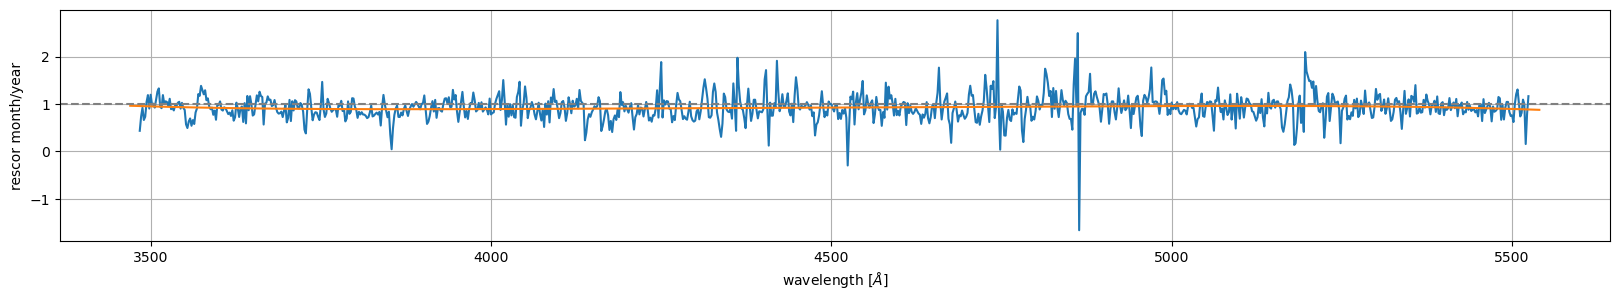

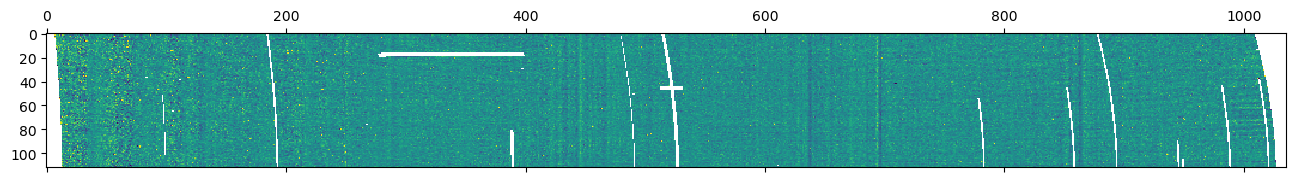

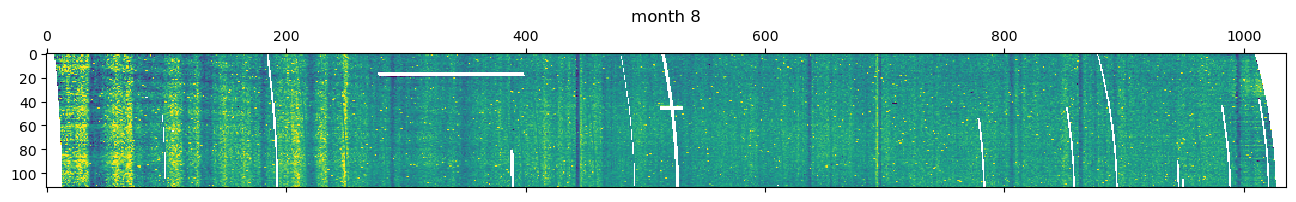

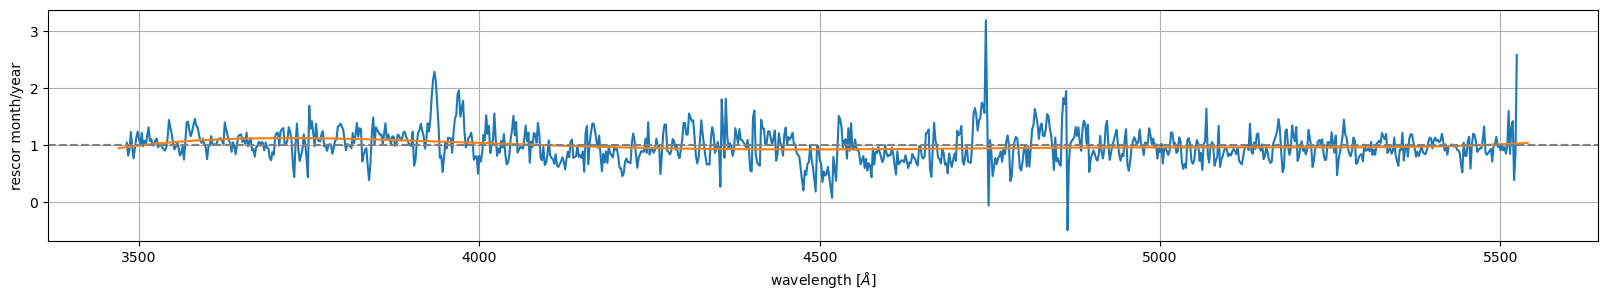

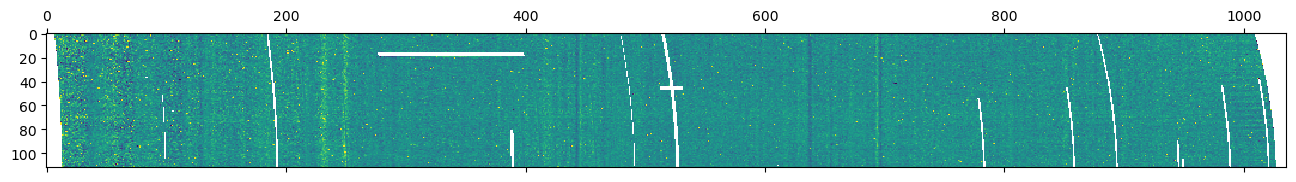

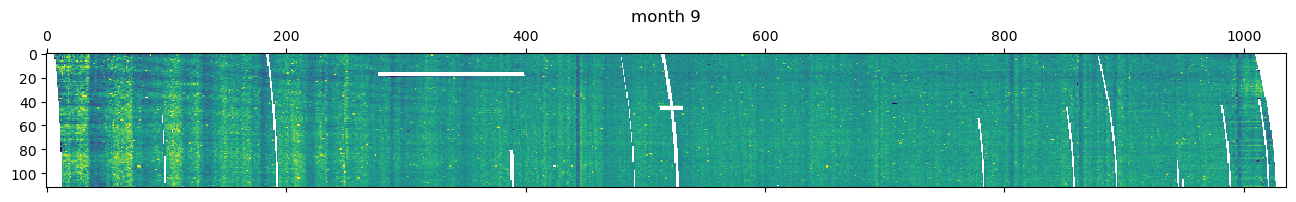

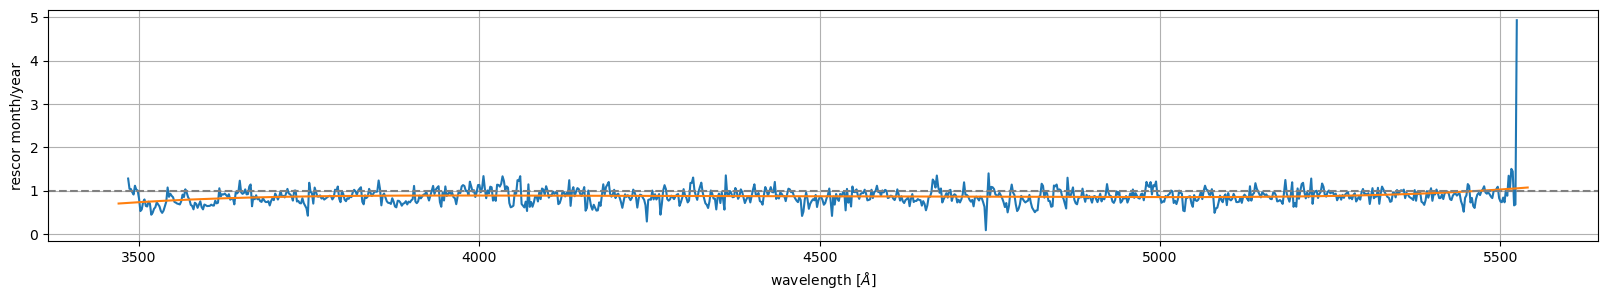

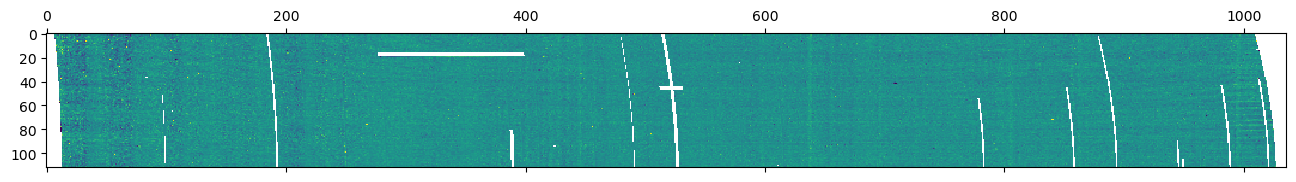

In [5]:
vmin, vmax = -0.1, 0.1
plt.matshow(rescor_year, vmin=vmin, vmax=vmax)
plt.title("year")
print("year : ", np.sum(np.abs(rescor_year) > 0.1) / np.size(rescor_year))

wavelength = np.arange(3470, 5542, 2)

for i in rescor_month.keys():
    plt.matshow(rescor_month[i], vmin=vmin, vmax=vmax)
    plt.title(f"month {i}")

    if True:
        mean_ratio = np.nanmedian(rescor_month[i] / rescor_year, axis=0)
        finite = np.isfinite(mean_ratio)
        scaling = np.polyfit(wavelength[finite], mean_ratio[finite], 5)
        plt.figure(figsize=(20,3))
        plt.grid()
        plt.plot(wavelength, mean_ratio)
        plt.plot(wavelength, np.polyval(scaling, wavelength))
        plt.axhline(1, linestyle='--', color='gray')
        plt.ylabel("rescor month/year")
        plt.xlabel(r"wavelength [$\AA$]")

        plt.matshow(rescor_month[i] - np.polyval(scaling, wavelength) * rescor_year, vmin=-0.1, vmax=0.1)

# check by PA

In [41]:
multiframe = "combined_multi_027_085_001_RU.h5"

pa_0_file = os.path.join("/scratch/05865/maja_n/ffskysub/rescor/nomask/201810/combined/pa_W", multiframe)
pa_1_file = os.path.join("/scratch/05865/maja_n/ffskysub/rescor/nomask/201810/combined/pa_E", multiframe)

with h5py.File(pa_0_file, "r") as ff:
    pa_0_rescor = ff['rescor'][:]

with h5py.File(pa_1_file, "r") as ff:
    pa_1_rescor = ff['rescor'][:]

#with h5py.File(pa_2_file, "r") as ff:
#    pa_2_rescor = ff['rescor'][:]

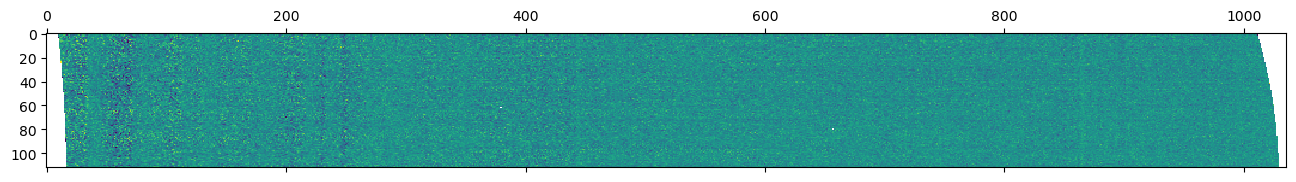

In [42]:
vmin, vmax = -0.1, 0.1
plt.matshow(median_filter(pa_0_rescor - pa_1_rescor, size=1) , vmin=vmin, vmax=vmax)
#plt.matshow(median_filter(pa_0_rescor - pa_2_rescor, size=1) , vmin=vmin, vmax=vmax)

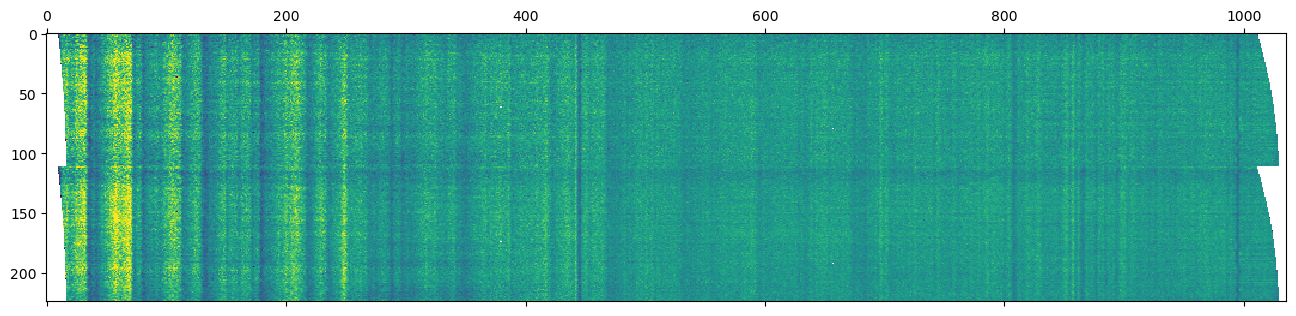

In [43]:
vmin, vmax = -0.1, 0.1
plt.matshow(np.concatenate([pa_0_rescor, pa_1_rescor]), vmin=vmin, vmax=vmax)